###         **NLP Project for Disaster Tweet Classification**

In [323]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [324]:
nlp_data=pd.read_csv('twitter_disaster.csv')

In [325]:
nlp_data

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [326]:
nlp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [327]:
nlp_data.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [328]:
nlp_data['keyword'].unique()

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'der

In [329]:
nlp_data['location'].unique()

array([nan, 'Birmingham', 'Est. September 2012 - Bristol', ...,
       'Vancouver, Canada', 'London ', 'Lincoln'], dtype=object)

In [330]:
nlp_data.describe().round(2)

,id,target
count,7613.00,7613.00
mean,5441.93,0.43
std,3137.12,0.50
min,1.00,0.00
25%,2734.00,0.00
50%,5408.00,0.00
75%,8146.00,1.00
max,10873.00,1.00


### Replacing the Null Values to object columns

In [331]:
nlp_data['location'].fillna('Unknown', inplace=True)
nlp_data['keyword'].fillna('NotAvailable', inplace=True)

### Class Distribution

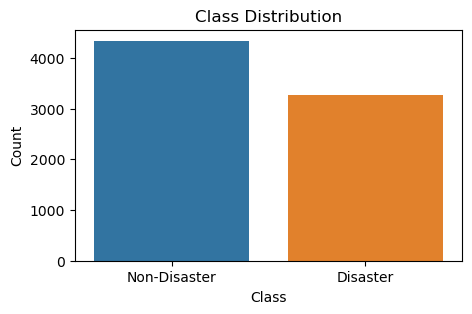

In [332]:
plt.figure(figsize=(5,3))
sns.countplot(x='target', data=nlp_data)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0,1],['Non-Disaster','Disaster'])
plt.show()

### Filter disaster tweet

In [333]:
disaster_tweets=nlp_data[nlp_data['target']==1]['text']

In [334]:
disaster_tweets

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 3271, dtype: object

### Tokenize and count word frequencies

In [335]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pooji\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [336]:
from collections import Counter
from nltk.tokenize import word_tokenize

disaster_tweets = nlp_data[nlp_data['target']==1] ['keyword']
word_freq=Counter()

for tweet in disaster_tweets:
    if pd.notnull(tweet):
        tokens = word_tokenize(tweet.lower())
        word_freq.update(tokens)

print(word_freq)


Counter({'%': 708, 'suicide': 94, '20fires': 72, 'buildings': 52, '20storm': 50, '20disaster': 49, 'mass': 47, 'emergency': 46, 'nuclear': 45, '20fire': 43, 'notavailable': 42, 'forest': 42, 'derailment': 39, 'outbreak': 39, 'wreckage': 39, 'debris': 37, 'oil': 37, '20spill': 37, 'typhoon': 37, 'fire': 33, 'evacuated': 32, 'rescuers': 32, '20bomb': 32, '20bombing': 32, 'burning': 31, 'razed': 31, 'airplane': 30, '20accident': 30, 'earthquake': 30, '20bomber': 30, 'bridge': 29, '20collapse': 29, 'collision': 29, 'wildfire': 29, '20on': 28, 'casualties': 28, 'drought': 28, 'evacuation': 28, '20murder': 28, 'sandstorm': 28, 'bombing': 27, 'devastation': 27, 'hostages': 27, 'sinkhole': 27, 'wild': 27, 'deaths': 26, 'derailed': 26, 'displaced': 26, 'famine': 26, 'fatal': 26, 'fatalities': 26, 'floods': 26, 'thunderstorm': 26, 'violent': 26, 'wounded': 26, 'attack': 25, 'evacuate': 25, 'flooding': 25, 'heat': 25, '20wave': 25, 'massacre': 25, 'accident': 24, '20burning': 24, 'dust': 24, 'hai

### Frequency of phrases 

In [337]:
from collections import Counter
import re

# Function to preprocess text and extract phrases
def extract_phrases(text, n=3):
    text = re.sub(r'[^\w\s]', '', text.lower())  # Remove punctuation and convert to lowercase
    words = text.split()
    phrases = [' '.join(words[i:i+n]) for i in range(len(words)-n+1)]
    return phrases

# Apply the function to the disaster tweets
disaster_tweets['phrases'] = nlp_data['text'].apply(extract_phrases)

# Flatten the list of phrases
all_phrases = [phrase for sublist in disaster_tweets['phrases'] for phrase in sublist]

# Count the frequency of each phrase
phrase_freq = Counter(all_phrases)

# Get the top 20 phrases
top_phrases = phrase_freq.most_common(20)

top_phrases

C:\Users\pooji\AppData\Local\Temp\ipykernel_15952\1905654878.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disaster_tweets['phrases'] = nlp_data['text'].apply(extract_phrases)


[('i liked a', 42),
 ('liked a youtube', 42),
 ('a youtube video', 42),
 ('northern california wildfire', 29),
 ('more homes razed', 29),
 ('homes razed by', 29),
 ('the latest more', 28),
 ('latest more homes', 28),
 ('razed by northern', 28),
 ('pkk suicide bomber', 28),
 ('suicide bomber who', 28),
 ('bomber who detonated', 28),
 ('who detonated bomb', 28),
 ('detonated bomb in', 28),
 ('by northern california', 27),
 ('16yr old pkk', 27),
 ('old pkk suicide', 27),
 ('families to sue', 26),
 ('to sue over', 26),
 ('sue over legionnaires', 26)]

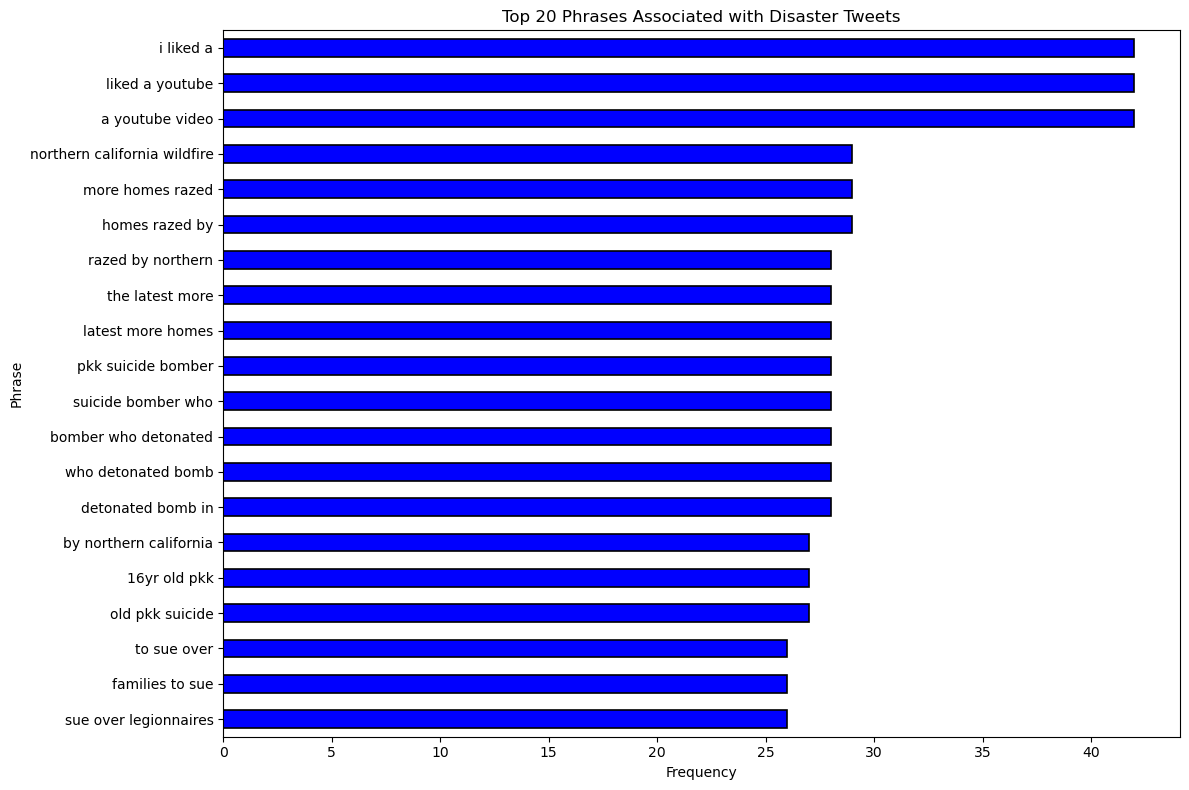

In [338]:
# Plot the top 20 phrases
plt.figure(figsize=(12, 8))
pd.Series(dict(top_phrases)).sort_values().plot(kind='barh', color='blue', edgecolor='black', linewidth=1.2)
plt.title('Top 20 Phrases Associated with Disaster Tweets')
plt.xlabel('Frequency')
plt.ylabel('Phrase')
plt.tight_layout()
plt.show()

### Find Special Characters in dataset

In [339]:
import re

def find_special_characters(text):
    special_characters = re.findall(r'[^a-zA-Z0-9\s]', text)
    return special_characters

nlp_data['special_characters']=nlp_data['text'].apply(find_special_characters)

### Display rows with special characters

In [340]:
rows_with_special_characters = nlp_data[nlp_data['special_characters'].apply(lambda x: len(x) > 0)]
print(rows_with_special_characters)

         id       keyword location  \
0         1  NotAvailable  Unknown   
1         4  NotAvailable  Unknown   
2         5  NotAvailable  Unknown   
3         6  NotAvailable  Unknown   
4         7  NotAvailable  Unknown   
...     ...           ...      ...   
7608  10869  NotAvailable  Unknown   
7609  10870  NotAvailable  Unknown   
7610  10871  NotAvailable  Unknown   
7611  10872  NotAvailable  Unknown   
7612  10873  NotAvailable  Unknown   

                                                   text  target  \
0     Our Deeds are the Reason of this #earthquake M...       1   
1                Forest fire near La Ronge Sask. Canada       1   
2     All residents asked to 'shelter in place' are ...       1   
3     13,000 people receive #wildfires evacuation or...       1   
4     Just got sent this photo from Ruby #Alaska as ...       1   
...                                                 ...     ...   
7608  Two giant cranes holding a bridge collapse int...       1   
7609  @

### Clean the text data

In [341]:
import re

Unique_special_characters = {'ü', '£', 'Ó', '!', '>', '`', '^', '\x9d', '}', '[', ';', ':', 'ª', 'Ï', '¬', '|', '~', '*', ',', 'ã', '¢', '\\', '+', '¨', 'å', '¤', "'", '', 'Ò', '/', 'Û', '©', 'Ç', '¡', '#', '«', ')', 'Ê', 'Â', '_', ']', '÷', 'â', '\x89', '@', '$', '?', '&', 'Ñ', '(', '{', '.', '-', '=', '%', '¼', 'Ì', 'È'}

def clean_text(text):
    text = re.sub(r'http\S+|www.\S+', '', text) 
    text = re.sub(r'[{}]'.format(''.join(re.escape(c) for c in Unique_special_characters)), ' ', text)    
    text = re.sub(r'[^\w\s]', '', text)          
    text = text.lower()                          
    return text

nlp_data['clean_text'] = nlp_data['text'].apply(clean_text)


In [342]:
rows_with_special_characters = nlp_data[nlp_data['clean_text'].str.contains(r'[{}]'.format(''.join(Unique_special_characters)))]
print(rows_with_special_characters)

Empty DataFrame
Columns: [id, keyword, location, text, target, special_characters, clean_text]
Index: []


In [343]:
rows_with_special_characters

,id,keyword,location,text,target,special_characters,clean_text


### Tokenize the text

In [344]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [345]:
## Download the necessary resouces

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pooji\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pooji\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pooji\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [346]:
## Tokenization 

nlp_data['tokens']= nlp_data['clean_text'].apply(word_tokenize)

In [347]:
## Remove Stop words

stop_words = set(stopwords.words('english'))
nlp_data['tokens']=nlp_data['tokens'].apply(lambda tokens: [word for word in tokens if word.lower() not in stop_words])


In [348]:
## Lemmatization

lemmatizer = WordNetLemmatizer()
nlp_data['lemmatized_tokens']=nlp_data['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

In [349]:
nlp_data.head()

,id,keyword,location,text,target,special_characters,clean_text,tokens,lemmatized_tokens
0,1,NotAvailable,Unknown,Our Deeds are the Reason of this #earthquake M...,1,[#],our deeds are the reason of this earthquake m...,"[deeds, reason, earthquake, may, allah, forgiv...","[deed, reason, earthquake, may, allah, forgive..."
1,4,NotAvailable,Unknown,Forest fire near La Ronge Sask. Canada,1,[.],forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]"
2,5,NotAvailable,Unknown,All residents asked to 'shelter in place' are ...,1,"[', ', .]",all residents asked to shelter in place are ...,"[residents, asked, shelter, place, notified, o...","[resident, asked, shelter, place, notified, of..."
3,6,NotAvailable,Unknown,"13,000 people receive #wildfires evacuation or...",1,"[,, #]",13 000 people receive wildfires evacuation or...,"[13, 000, people, receive, wildfires, evacuati...","[13, 000, people, receive, wildfire, evacuatio..."
4,7,NotAvailable,Unknown,Just got sent this photo from Ruby #Alaska as ...,1,"[#, #]",just got sent this photo from ruby alaska as ...,"[got, sent, photo, ruby, alaska, smoke, wildfi...","[got, sent, photo, ruby, alaska, smoke, wildfi..."


### Training & Testing the model

In [350]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(nlp_data['lemmatized_tokens'].apply(lambda x: ' '.join(x)))

# Target variable
y = nlp_data['target']

In [351]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [352]:
print('\nTraining set shape:', X_train.shape, y_train.shape)
print('\nTesting set shape:', X_test.shape, y_test.shape)


Training set shape: (6090, 15548) (6090,)

Testing set shape: (1523, 15548) (1523,)


## Part 2: Feature Engineering and Model Selection

### Task Feature Engineering

In [356]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.sentiment import SentimentIntensityAnalyzer

In [369]:
nlp_data['lemmatized_token']=nlp_data['lemmatized_tokens'].apply(lambda x:' '.join(x))

### Word Frequency

In [370]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
X_count = count_vectorizer.fit_transform(nlp_data['lemmatized_token'])

In [371]:
## Display the features name

print('Feature names:',count_vectorizer.get_feature_names_out()[:10])

Feature names: ['00' '000' '0000' '00end' '00pm' '01' '02' '0215' '02pm' '03']


In [372]:
word_freq_df = pd.DataFrame(X_count.toarray(), columns=count_vectorizer.get_feature_names_out())
print("\nWord Frequencies:")
print(word_freq_df.head())


Word Frequencies:
   00  000  0000  00end  00pm  01  02  0215  02pm  03  ...  zonewolf123  zoom  \
0   0    0     0      0     0   0   0     0     0   0  ...            0     0   
1   0    0     0      0     0   0   0     0     0   0  ...            0     0   
2   0    0     0      0     0   0   0     0     0   0  ...            0     0   
3   0    1     0      0     0   0   0     0     0   0  ...            0     0   
4   0    0     0      0     0   0   0     0     0   0  ...            0     0   

   zotar  zouma  zourryart  zrnf  zumiez  zurich  zxathetis  zzzz  
0      0      0          0     0       0       0          0     0  
1      0      0          0     0       0       0          0     0  
2      0      0          0     0       0       0          0     0  
3      0      0          0     0       0       0          0     0  
4      0      0          0     0       0       0          0     0  

[5 rows x 15548 columns]


### TF-IDF 

In [374]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
X_tfidf_sparse = tfidf_vectorizer.fit_transform(nlp_data['lemmatized_token'])

In [376]:
feature_names = tfidf_vectorizer.get_feature_names_out()
feature_names

array(['00', '000', '0000', ..., 'zurich', 'zxathetis', 'zzzz'],
      dtype=object)

In [378]:
for doc_idx, doc in enumerate(X_tfidf_sparse):
    print(f"Document {doc_idx + 1}:")
    # Convert the sparse matrix row to an array
    doc_array = doc.toarray()[0]
    for word_idx, word in enumerate(feature_names):
        tfidf_score = doc_array[word_idx]
        if tfidf_score > 0:
            print(f"  Word: {word}, TF-IDF Score: {tfidf_score:.4f}")

Document 1:
  Word: allah, TF-IDF Score: 0.4248
  Word: deed, TF-IDF Score: 0.4918
  Word: earthquake, TF-IDF Score: 0.3375
  Word: forgive, TF-IDF Score: 0.4918
  Word: may, TF-IDF Score: 0.3038
  Word: reason, TF-IDF Score: 0.3601
Document 2:
  Word: canada, TF-IDF Score: 0.3880
  Word: fire, TF-IDF Score: 0.2203
  Word: forest, TF-IDF Score: 0.3064
  Word: la, TF-IDF Score: 0.3531
  Word: near, TF-IDF Score: 0.3153
  Word: ronge, TF-IDF Score: 0.4914
  Word: sask, TF-IDF Score: 0.4914
Document 3:
  Word: asked, TF-IDF Score: 0.2719
  Word: evacuation, TF-IDF Score: 0.2096
  Word: expected, TF-IDF Score: 0.2517
  Word: notified, TF-IDF Score: 0.3247
  Word: officer, TF-IDF Score: 0.2285
  Word: order, TF-IDF Score: 0.2204
  Word: place, TF-IDF Score: 0.4569
  Word: resident, TF-IDF Score: 0.2760
  Word: shelter, TF-IDF Score: 0.5723
Document 4:
  Word: 000, TF-IDF Score: 0.4463
  Word: 13, TF-IDF Score: 0.3669
  Word: california, TF-IDF Score: 0.2764
  Word: evacuation, TF-IDF Score: